In [1]:
import numpy as np
import matplotlib.pylab as plt
import re
import sys
from astropy.io import fits
import scipy.stats
from astropy import coordinates as coord
from astropy import units as u
from astropy.time import Time
import pdb

In [2]:
dithertiles = np.genfromtxt('/Users/crockosi/desi/observing/dithertiles.txt',comments='#',dtype=[('id','i8'),('tileid','i8'),('ra','f8'),('dec','f8'),('program','S4'),('selected','S6')])

In [3]:
dtilecoords = coord.SkyCoord(dithertiles['ra']*u.deg,dithertiles['dec']*u.deg,frame='icrs')

Text(0.5, 1.0, 'Precision dither tiles')

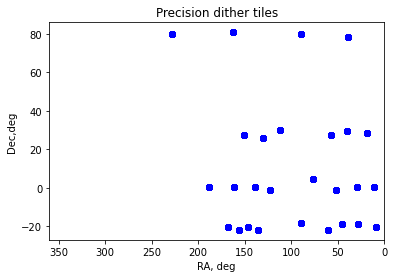

In [54]:
plt.plot(dtilecoords.ra,dtilecoords.dec,'bo')
plt.xlim(360,0)
plt.xlabel('RA, deg')
plt.ylabel('Dec,deg')
plt.title('Precision dither tiles')

object with location of KPNO

In [5]:
kpnoloc = coord.EarthLocation.of_site('Kitt Peak')

Pick an observing time. This could be upgraded with a "get the time now" functionality

In [6]:
thisobstime = Time('2020-12-28T4:30:00',scale='utc',location=kpnoloc)


Make an astropy coordinate object with our tiles.

In [7]:
dtilecoords = coord.SkyCoord(dithertiles['ra']*u.deg,dithertiles['dec']*u.deg,frame='icrs',location=kpnoloc)

Various ways to display the coordinate info

In [8]:
print(dtilecoords[0].ra)
print(dtilecoords[0].dec)

18d24m00s
28d20m24s


In [9]:
dtilecoords[0].ra.deg

18.4

In [10]:
dtilecoords[0].ra.hour

1.2266666666666668

Now find the geographic latitude,longitude of our fields at this observing time. <br>
Latitude = Declination. We will convert longitude to HA with the longitue location of KPNO.

In [56]:
dtilecoordsnow = dtilecoords.transform_to(coord.ITRS(obstime=thisobstime))

We need to make a spherical representation, since we get cartesian. But the time and location info don't get copied into the representation, so we need to keep our original version. There must be a way to do this...

In [57]:
dtilecoordsnow[0]

<SkyCoord (ITRS: obstime=2020-12-28T04:30:00.000): (x, y, z) [dimensionless]
    (-0.72822156, -0.49266785, 0.47641552)>

Check that we got the sidereal time right based on our obsdate and time and location. I checked this with skycalc, you can use one one of the observing displays if you want to do the same for your night.

In [64]:
dtilecoordsnow.obstime.sidereal_time('apparent')

<Longitude 3.53373166 hourangle>

In [58]:
dtilecoordsnowsp = dtilecoordsnow.spherical

In [59]:
dtilecoordsnowsp[0]

<SphericalRepresentation (lon, lat, distance) in (deg, deg, )
    (214.07975274, 28.45155424, 1.)>

In [60]:
dtilecoordsnowsp[0].lon.hourangle

14.271983516073792

Text(0, 0.5, 'Dec (= Geo. lat.),deg')

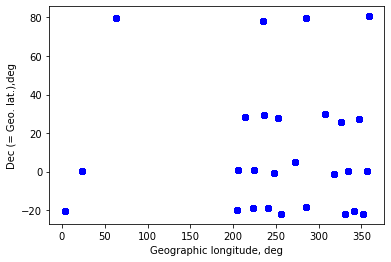

In [61]:
plt.plot(dtilecoordsnowsp.lon,dtilecoordsnowsp.lat,'bo')
plt.xlabel('Geographic longitude, deg')
plt.ylabel('Dec (= Geo. lat.),deg')

Now we need to make this into hour angle, for which we need the longitude of KPNO

Here is the process for one field, tile 80332

In [65]:
itest,=np.where(dithertiles['tileid'] == 80332)

In [66]:
itest

array([78])

In [67]:
print(dtilecoordsnow[78])
print(dtilecoordsnowsp[78])

<SkyCoord (ITRS: obstime=2020-12-28T04:30:00.000): (x, y, z) [dimensionless]
    (-0.85264688, -0.39257659, -0.34478533)>
(204.72233927, -20.16869223, 1.) (deg, deg, )


In [68]:
dtilecoords[78]

<SkyCoord (ICRS): (ra, dec) in deg
    (9.07, -20.28)>

In [69]:
hanowraw = kpnoloc.lon-dtilecoordsnowsp[78].lon

In [70]:
hanowraw + 360*u.deg

<Angle 43.67766073 deg>

In [71]:
hanow = hanowraw.wrap_at(180*u.deg)

In [72]:
print(hanowraw)
print(hanow)

-316d19m20.4214s
43d40m39.5786s


Now the whole vector

In [74]:
dtilehanow = kpnoloc.lon-dtilecoordsnowsp.lon

In [75]:
dtilehanow.wrap_at(180*u.deg,inplace=True)

Text(0, 0.5, 'Dec, degrees')

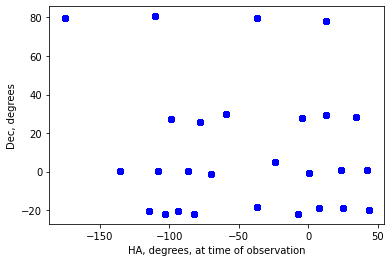

In [77]:
plt.plot(dtilehanow,dtilecoordsnowsp.lat,'bo')
plt.xlabel('HA, degrees, at time of observation')
plt.ylabel('Dec, degrees')

Now make the same plot with labels. Use the 1st tile in each stack of dither tiles since that is the tile we would observe if not dithering (and because putting all the labels makes the plot unreadable)

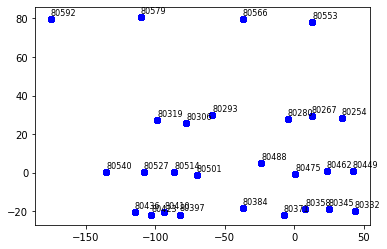

In [78]:
plt.plot(dtilehanow,dtilecoordsnowsp.lat,'bo')
for i in range(0,351,13):
    plt.text(dtilehanow[i].value,dtilecoordsnowsp[i].lat.value+2,dithertiles['tileid'][i],fontsize=8)